# Rotación


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import interpolate

## Reubicación
* Vamos a ubicar la imagen en un cuadrado, cada lado del cudrado tendra la misma medida de la diagonal de la imagen, de tal manera que si la imagen es rotada 45 grados la diagonal completa quepa en la matriz de respuesta

In [2]:
def reubicar(img):
    print img.shape
    size = int(np.ceil(np.linalg.norm(img.shape[0:2])))
    if len(img.shape) is 2: ans = np.zeros([size,size], dtype=np.uint8);
    else: ans = np.zeros([size,size,3], dtype=np.uint8);
    ans[(size-img.shape[0])/2:(size+img.shape[0])/2,(size-img.shape[1])/2:(size+img.shape[1])/2  ] = img
    return ans

## Sin interpolación

* reubicar la imagen para evitar perdida de información
* Tomamos los pixeles de destino.
* Convertimos las coordenadas de destino a coordenadas origen
* Verificamos que las coordenadas se encuentre en el rango [0, size]
* coordenada de destino = coordenada origen

In [3]:
def rotar_simple(img, angle):
    img = reubicar(img)
    angle = angle * np.pi / 180. #Convertir el ángulo a radianes
    mat = np.matrix([[np.cos(angle), np.sin(angle)],[-np.sin(angle), np.cos(angle)]]) # Crear la matriz de rotación
    
    ans = np.zeros(img.shape, dtype=np.uint8) #Imagen de respuesta
    # if j % 100 is 0: print j/float(diag) * 100 , "%"
    #Recorrer imagen 
    for j in range(-img.shape[0]/2,img.shape[0]/2): #Centrar el eje de rotación
        for i in range(-img.shape[0]/2,img.shape[0]/2):
            coord_o = np.array(np.round([float(i), float(j)] * mat) + img.shape[0]/2)[0] #Obtener la coordenada de origen
            if (coord_o > 0).all() and (coord_o < img.shape[0:2]).all(): #verificar los limites
                ans[j+img.shape[0]/2, i+img.shape[0]/2] = img[int(coord_o[1]),int(coord_o[0])] #Asignar el valor
                
    print "Listo (no interpolada)"
    return ans

## Rotar interpolado

* reubicar la imagen para evitar perdida de información
* Tomamos los pixeles de destino.
* Convertimos las coordenadas de destino a coordenadas origen
* Interpolamos el punto
* coordenada de destino = coordenada origen

In [4]:
def rotar_interp(img, angle):
    img = reubicar(img).astype(np.float32)
    angle = angle * np.pi / 180. #Convertir el ángulo a radianes
    mat = np.matrix([[np.cos(angle), np.sin(angle)],[-np.sin(angle), np.cos(angle)]]) # Crear la matriz de rotación
    
    ans = np.zeros(img.shape, dtype=np.float32) #Imagen de respuesta
    # if j % 100 is 0: print j/float(diag) * 100 , "%"
    #Recorrer imagen 
    for j in range(-img.shape[0]/2,img.shape[0]/2): #Centrar el eje de rotación
        for i in range(-img.shape[0]/2,img.shape[0]/2):
            coord_o = np.array( [float(i), float(j)] * mat + img.shape[0]/2)[0] #Obtener la coordenada de origen
            
            if (coord_o > 1).all() and (coord_o+1 < img.shape[0:2]).all(): #verificar los limites
                # Buscar las coordenadas más cercanas para interpolar
                x1, x2 = int(np.floor(coord_o[0])), int(np.ceil(coord_o[0]))
                y1, y2 = int(np.floor(coord_o[1])), int(np.ceil(coord_o[1]))
                
                #interpolacion lineal
                z1 = ( coord_o[0] - x1 ) * ( ( img[x1, y1] - img[x2, y1]) / ( x1 - x2 ) ) + img[x1, y1]
                z2 = ( coord_o[0] - x1 ) * ( ( img[x1, y2] - img[x2, y2]) / ( x1 - x2 ) ) + img[x1, y2]
                z3 = ( coord_o[1] - y1 ) * ( ( z1 - z2 ) / ( y1 - y2 ) ) + z1
                
                ans[j+img.shape[0]/2, i+img.shape[0]/2] = z3 #Asignar el valor
                
    print "Listo (Interpolada)"
    return ans.astype(np.uint8)

## Resultados

In [5]:
img = cv2.imread('../Lenna.png',0)

grados = 10 #Grados Sexagesimales

interpolada = rotar_interp(img,grados)
no_interpolada = rotar_simple(img,grados)

(512L, 512L)


E:\Anaconda2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in divide
E:\Anaconda2\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in divide


Listo (Interpolada)
(512L, 512L)
Listo (no interpolada)


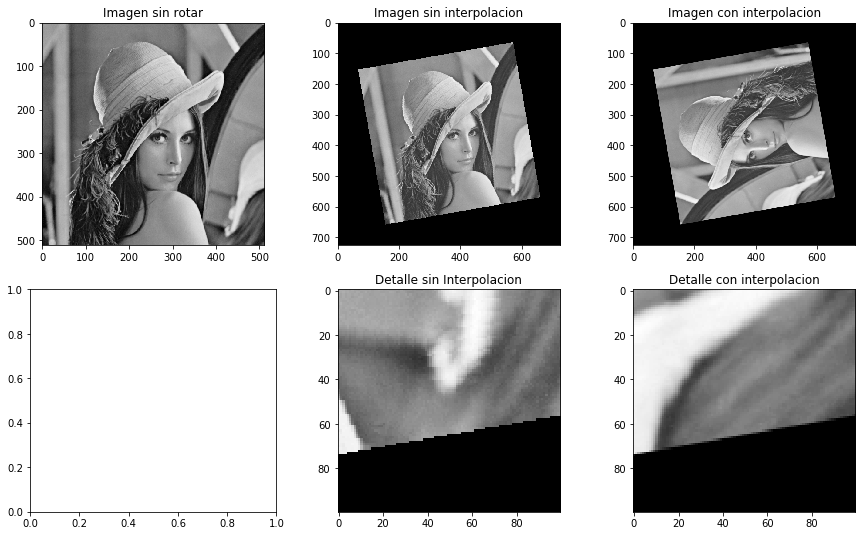

In [8]:
f, sub = plt.subplots(2,3)
f.set_size_inches(15, 9)

sub[0,0].imshow(img, cmap='gray'); sub[0,0].set_title("Imagen sin rotar")
sub[0,1].imshow(no_interpolada, cmap='gray'); sub[0,1].set_title("Imagen sin interpolacion")
sub[0,2].imshow(interpolada, cmap='gray'); sub[0,2].set_title("Imagen con interpolacion")

x,y,l = 520, 520, 100
sub[1,1].imshow(no_interpolada[y:y+l,y:y+l], cmap='gray'); sub[1,2].set_title("Detalle con interpolacion")
sub[1,2].imshow(interpolada[y:y+l,y:y+l], cmap='gray'); sub[1,1].set_title("Detalle sin Interpolacion")

plt.show()

## Referencias
* [Articulo acerca de rotación en el blog Leptonica](http://www.leptonica.com/rotation.html)